# Atividade de Clusterização - Análise de Dados Socioeconômicos

**Disciplina:** Algoritmos de Inteligência Artificial para clusterização [25E4_2]
**Aluno:** Valdeci Gomes
**Data:** 01/11/2025

---

## Parte 1: Infraestrutura

### Verificação do Ambiente

In [20]:
import sys
import platform
import os

print(f"Versão do Python: {sys.version}")
print(f"Sistema Operacional: {platform.system()} {platform.release()}")
print(f"Diretório atual: {os.getcwd()}")
print(f"Ambiente virtual ativo: {sys.prefix != sys.base_prefix}")

Versão do Python: 3.11.8 (main, Feb  6 2024, 21:21:21) [Clang 15.0.0 (clang-1500.1.0.2.5)]
Sistema Operacional: Darwin 24.6.0
Diretório atual: /Users/valfilho/Repo/master/kiro-activity
Ambiente virtual ativo: True


### Conteúdo do requirements.txt

In [38]:
# Ler e exibir o conteúdo do arquivo requirements.txt
try:
    with open('requirements.txt', 'r', encoding='utf-8') as file:
        requirements_content = file.read()
    print("Conteúdo do requirements.txt:")
    print("=" * 40)
    print(requirements_content)
    print("=" * 40)
except FileNotFoundError:
    print("Arquivo requirements.txt não encontrado no diretório atual.")
    print("Certifique-se de que o arquivo está na mesma pasta do notebook.")

Conteúdo do requirements.txt:
# Bibliotecas para análise de dados e clusterização
pandas>=1.5.0
numpy>=1.21.0
matplotlib>=3.5.0
seaborn>=0.11.0
scikit-learn>=1.1.0
scipy>=1.9.0
jupyter>=1.0.0
notebook>=6.4.0

# Bibliotecas opcionais para melhor visualização
plotly>=5.0.0
ipywidgets>=7.6.0


### Importação das Bibliotecas Necessárias

In [39]:
# Bibliotecas para manipulação de dados
import pandas as pd
import numpy as np

# Bibliotecas para visualização
import matplotlib.pyplot as plt
import seaborn as sns

# Bibliotecas para clusterização
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import cdist

# Configurações de visualização
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (10, 6)

print("Todas as bibliotecas importadas com sucesso!")

Todas as bibliotecas importadas com sucesso!


---
## Parte 2: Escolha de Base de Dados

### Carregamento dos Dados

In [22]:
# Carregue o dataset do Kaggle aqui
# Substitua 'caminho_para_o_arquivo.csv' pelo caminho real do arquivo
df = pd.read_csv('Country-data.csv')

print(f"Dimensões do dataset: {df.shape}")
print(f"\nPrimeiras 5 linhas:")
df.head()

Dimensões do dataset: (167, 10)

Primeiras 5 linhas:


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


### Questão 2.1: Quantos países existem no dataset?

In [23]:
num_paises = len(df)
print(f"Número total de países no dataset: {num_paises}")

# Verificar se há países duplicados
if 'country' in df.columns:
    paises_unicos = df['country'].nunique()
    print(f"Número de países únicos: {paises_unicos}")
else:
    print("Coluna 'country' não encontrada. Verificando estrutura dos dados...")
    print(df.columns.tolist())

Número total de países no dataset: 167
Número de países únicos: 167


### Questão 2.2: Análise Exploratória - Faixa Dinâmica das Variáveis

In [24]:
# Informações gerais sobre o dataset
print("Informações gerais do dataset:")
df.info()
print("\nEstatísticas descritivas:")
df.describe()

Informações gerais do dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB

Estatísticas descritivas:


,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


Colunas numéricas: ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']


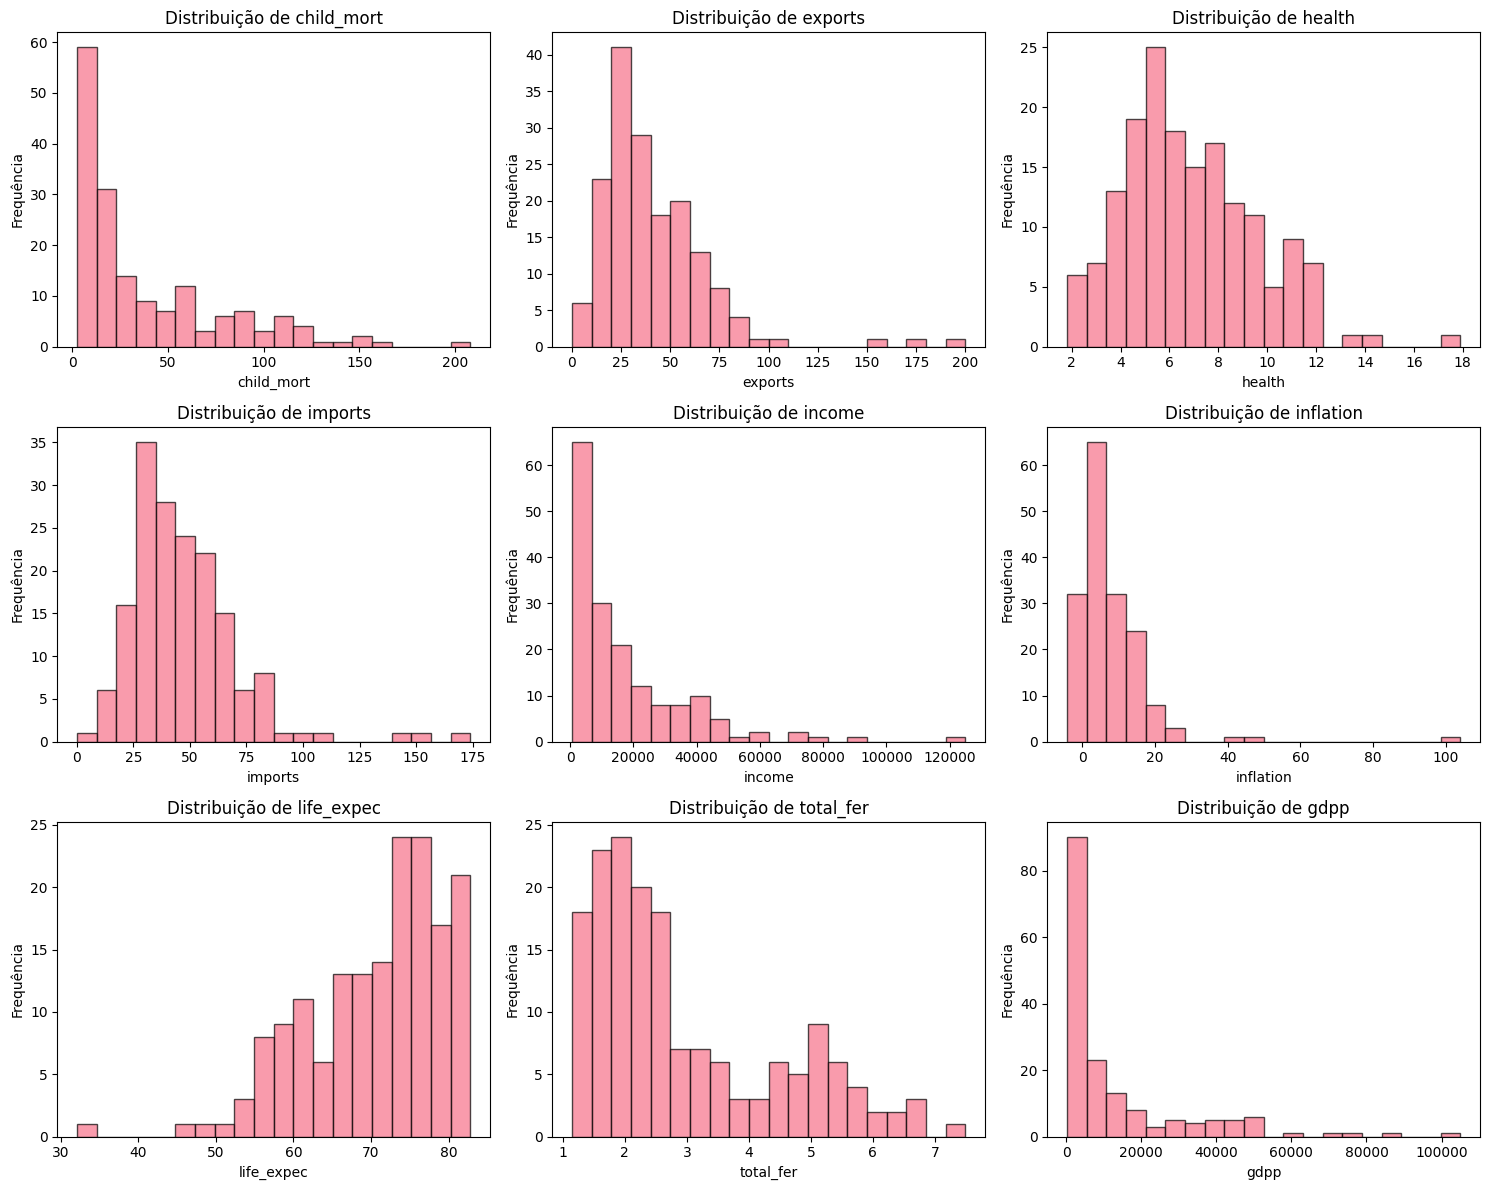

In [25]:
# Identificar colunas numéricas (excluindo a coluna de países se existir)
numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()
print(f"Colunas numéricas: {numeric_columns}")

# Visualização da distribuição das variáveis
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))
axes = axes.ravel()

for i, col in enumerate(numeric_columns[:9]):
    axes[i].hist(df[col], bins=20, alpha=0.7, edgecolor='black')
    axes[i].set_title(f'Distribuição de {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequência')

# Remover subplots vazios se houver menos de 9 variáveis
for i in range(len(numeric_columns), 9):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

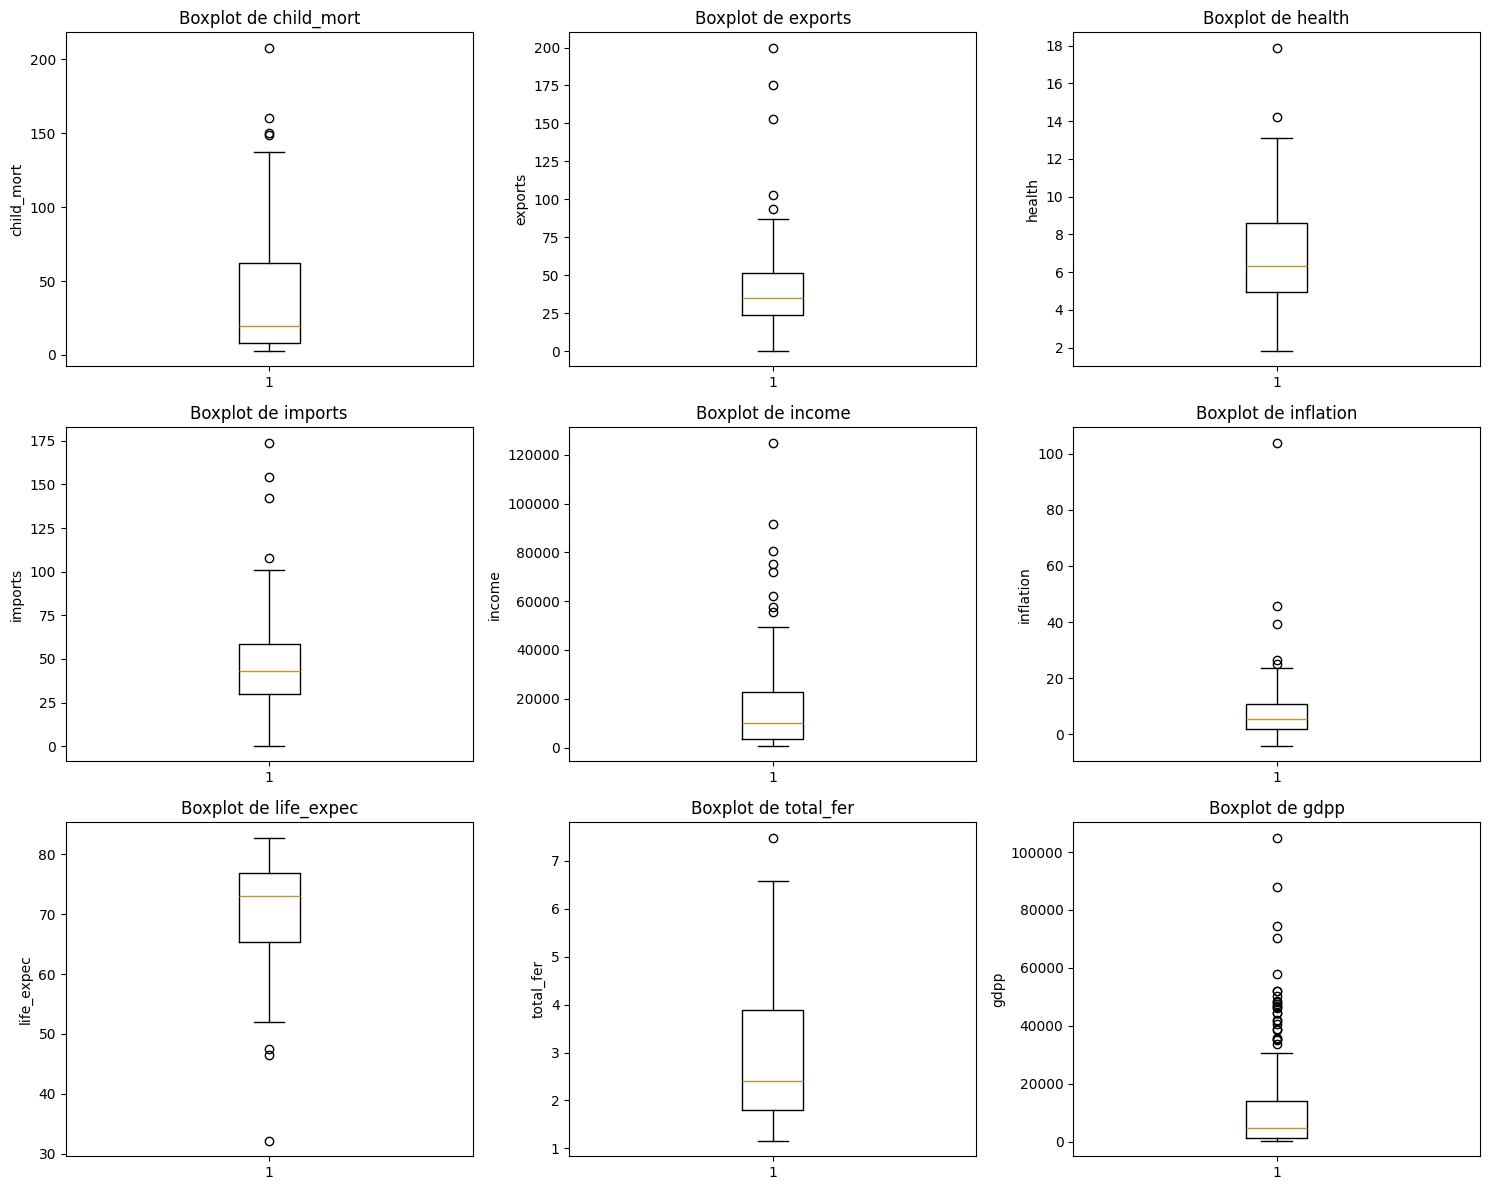

In [26]:
# Boxplots para identificar outliers
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))
axes = axes.ravel()

for i, col in enumerate(numeric_columns[:9]):
    axes[i].boxplot(df[col])
    axes[i].set_title(f'Boxplot de {col}')
    axes[i].set_ylabel(col)

# Remover subplots vazios se houver menos de 9 variáveis
for i in range(len(numeric_columns), 9):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

### Análise dos Resultados

**Observações sobre a faixa dinâmica das variáveis:**

1. **Escalas diferentes:** As variáveis possuem escalas muito diferentes (ex: algumas podem estar em porcentagem, outras em valores absolutos)
2. **Presença de outliers:** Alguns países podem apresentar valores extremos em certas variáveis
3. **Distribuições assimétricas:** Algumas variáveis podem não seguir distribuição normal

**O que deve ser feito antes da clusterização:**
- Normalização/Padronização dos dados
- Tratamento de outliers (se necessário)
- Verificação de valores ausentes

### Questão 2.3: Pré-processamento dos Dados

In [27]:
# Verificar valores ausentes
print("Valores ausentes por coluna:")
print(df.isnull().sum())

# Tratar valores ausentes se existirem
if df.isnull().sum().sum() > 0:
    print("\nTratando valores ausentes...")
    df_clean = df.fillna(df.mean(numeric_only=True))
else:
    df_clean = df.copy()
    print("\nNenhum valor ausente encontrado.")

Valores ausentes por coluna:
country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

Nenhum valor ausente encontrado.


In [28]:
# Separar dados numéricos para clusterização
# Assumindo que a primeira coluna é o nome do país
if df_clean.columns[0].lower() in ['country', 'pais', 'nation']:
    X = df_clean.iloc[:, 1:].select_dtypes(include=[np.number])
    countries = df_clean.iloc[:, 0]
else:
    X = df_clean.select_dtypes(include=[np.number])
    countries = df_clean.index

print(f"Dados para clusterização: {X.shape}")
print(f"Variáveis selecionadas: {X.columns.tolist()}")

Dados para clusterização: (167, 9)
Variáveis selecionadas: ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']


In [29]:
# Padronização dos dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns, index=X.index)

print("Dados padronizados:")
print(X_scaled_df.describe())

Dados padronizados:
         child_mort       exports        health       imports        income  \
count  1.670000e+02  1.670000e+02  1.670000e+02  1.670000e+02  1.670000e+02   
mean  -3.722904e-17  2.127373e-16  5.504579e-16  2.765585e-16 -7.977650e-17   
std    1.003008e+00  1.003008e+00  1.003008e+00  1.003008e+00  1.003008e+00   
min   -8.871383e-01 -1.500192e+00 -1.827827e+00 -1.939940e+00 -8.603259e-01   
25%   -7.466190e-01 -6.333367e-01 -6.922106e-01 -6.914785e-01 -7.174558e-01   
50%   -4.717981e-01 -2.235279e-01 -1.810007e-01 -1.487432e-01 -3.738080e-01   
75%    5.926666e-01  3.747198e-01  6.515412e-01  4.913530e-01  2.942370e-01   
max    4.221297e+00  5.813835e+00  4.047436e+00  5.266181e+00  5.611542e+00   

          inflation    life_expec     total_fer          gdpp  
count  1.670000e+02  1.670000e+02  1.670000e+02  1.670000e+02  
mean  -1.063687e-17  3.696311e-16  3.044803e-16  5.850277e-17  
std    1.003008e+00  1.003008e+00  1.003008e+00  1.003008e+00  
min   -1.137

---
## Parte 3: Clusterização

### 3.1: K-Médias

In [30]:
# Aplicar K-Médias com 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(X_scaled)

# Adicionar labels ao dataframe
df_kmeans = X.copy()
df_kmeans['Cluster_KMeans'] = kmeans_labels
df_kmeans['Country'] = countries

print(f"Silhouette Score K-Médias: {silhouette_score(X_scaled, kmeans_labels):.3f}")
print(f"\nDistribuição dos clusters:")
print(pd.Series(kmeans_labels).value_counts().sort_index())

Silhouette Score K-Médias: 0.283

Distribuição dos clusters:
0    36
1    47
2    84
Name: count, dtype: int64


### Interpretação dos Clusters K-Médias

Médias das variáveis por cluster:
                child_mort    exports    health    imports        income  \
Cluster_KMeans                                                             
0                 5.000000  58.738889  8.807778  51.491667  45672.222222   
1                92.961702  29.151277  6.388511  42.323404   3942.404255   
2                21.927381  40.243917  6.200952  47.473404  12305.595238   

                inflation  life_expec  total_fer          gdpp  
Cluster_KMeans                                                  
0                2.671250   80.127778   1.752778  42494.444444  
1               12.019681   59.187234   5.008085   1922.382979  
2                7.600905   72.814286   2.307500   6486.452381  


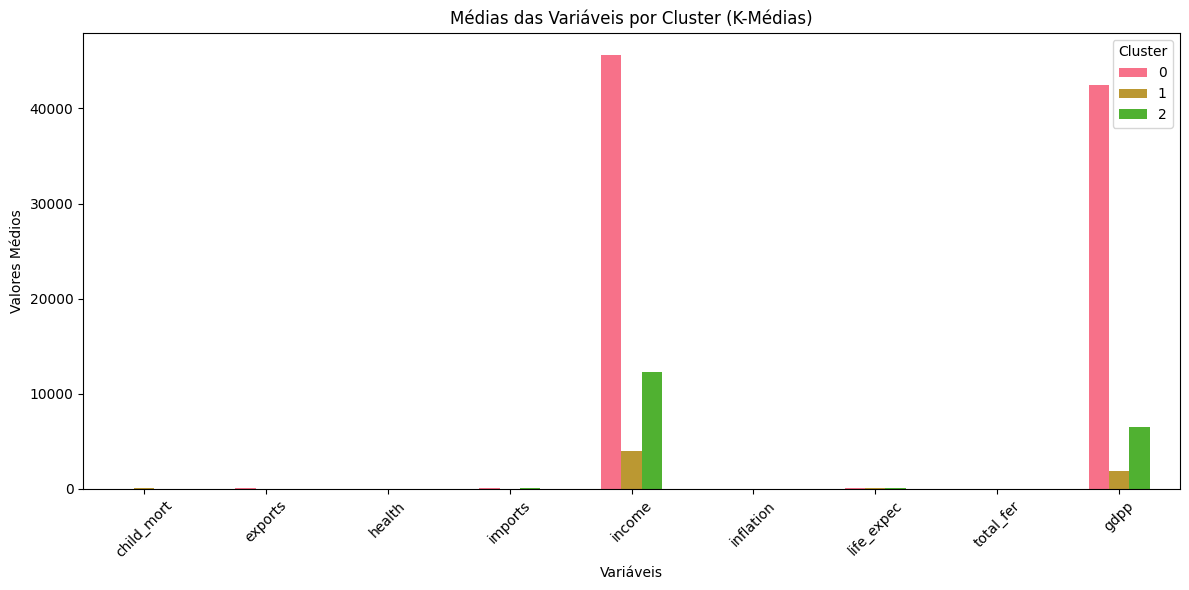

In [31]:
# Análise dos clusters por variável
cluster_analysis = df_kmeans.groupby('Cluster_KMeans')[X.columns].mean()
print("Médias das variáveis por cluster:")
print(cluster_analysis)

# Visualização das médias
cluster_analysis.T.plot(kind='bar', figsize=(12, 6))
plt.title('Médias das Variáveis por Cluster (K-Médias)')
plt.xlabel('Variáveis')
plt.ylabel('Valores Médios')
plt.legend(title='Cluster')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [32]:
# Encontrar o país mais próximo ao centróide de cada cluster
centroids = kmeans.cluster_centers_

for i in range(3):
    cluster_points = X_scaled[kmeans_labels == i]
    cluster_countries = countries[kmeans_labels == i]
    
    # Calcular distâncias ao centróide
    distances = cdist([centroids[i]], cluster_points, 'euclidean')[0]
    closest_idx = np.argmin(distances)
    
    representative_country = cluster_countries.iloc[closest_idx]
    
    print(f"\nCluster {i}:")
    print(f"País mais representativo: {representative_country}")
    print(f"Distância ao centróide: {distances[closest_idx]:.3f}")
    print(f"Número de países no cluster: {len(cluster_points)}")


Cluster 0:
País mais representativo: Iceland
Distância ao centróide: 0.732
Número de países no cluster: 36

Cluster 1:
País mais representativo: Guinea
Distância ao centróide: 0.829
Número de países no cluster: 47

Cluster 2:
País mais representativo: Jamaica
Distância ao centróide: 0.734
Número de países no cluster: 84


### 3.2: Clusterização Hierárquica

In [33]:
# Clusterização Hierárquica
hierarchical = AgglomerativeClustering(n_clusters=3, linkage='ward')
hierarchical_labels = hierarchical.fit_predict(X_scaled)

# Adicionar labels ao dataframe
df_hierarchical = X.copy()
df_hierarchical['Cluster_Hierarchical'] = hierarchical_labels
df_hierarchical['Country'] = countries

print(f"Silhouette Score Hierárquica: {silhouette_score(X_scaled, hierarchical_labels):.3f}")
print(f"\nDistribuição dos clusters:")
print(pd.Series(hierarchical_labels).value_counts().sort_index())

Silhouette Score Hierárquica: 0.246

Distribuição dos clusters:
0     34
1    106
2     27
Name: count, dtype: int64


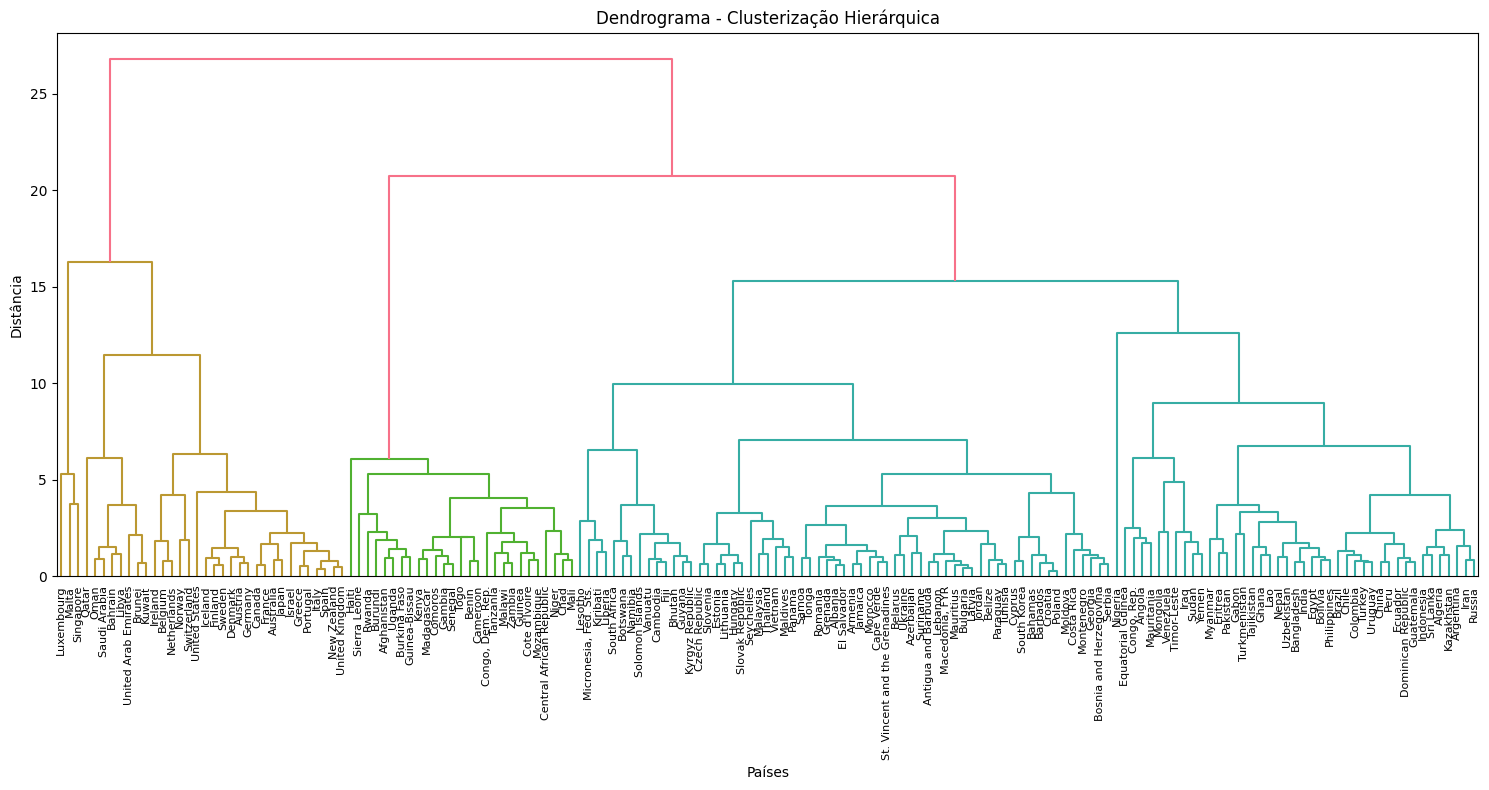

In [34]:
# Criar dendrograma
linkage_matrix = linkage(X_scaled, method='ward')

plt.figure(figsize=(15, 8))
dendrogram(linkage_matrix, 
           labels=countries.values if hasattr(countries, 'values') else countries,
           leaf_rotation=90,
           leaf_font_size=8)
plt.title('Dendrograma - Clusterização Hierárquica')
plt.xlabel('Países')
plt.ylabel('Distância')
plt.tight_layout()
plt.show()

### Interpretação do Dendrograma

O dendrograma mostra:
1. **Estrutura hierárquica:** Como os países se agrupam em diferentes níveis
2. **Distâncias:** A altura das ligações indica a dissimilaridade entre grupos
3. **Pontos de corte:** Onde cortar a árvore para obter o número desejado de clusters

### 3.3: Comparação dos Resultados

In [35]:
# Comparar os resultados dos dois métodos
comparison_df = pd.DataFrame({
    'Country': countries,
    'KMeans': kmeans_labels,
    'Hierarchical': hierarchical_labels
})

# Tabela de contingência
contingency_table = pd.crosstab(comparison_df['KMeans'], 
                               comparison_df['Hierarchical'], 
                               margins=True)
print("Tabela de Contingência (K-Médias vs Hierárquica):")
print(contingency_table)

# Calcular concordância
agreement = (comparison_df['KMeans'] == comparison_df['Hierarchical']).mean()
print(f"\nConcordância entre os métodos: {agreement:.2%}")

Tabela de Contingência (K-Médias vs Hierárquica):
Hierarchical   0    1   2  All
KMeans                        
0             31    5   0   36
1              0   20  27   47
2              3   81   0   84
All           34  106  27  167

Concordância entre os métodos: 30.54%


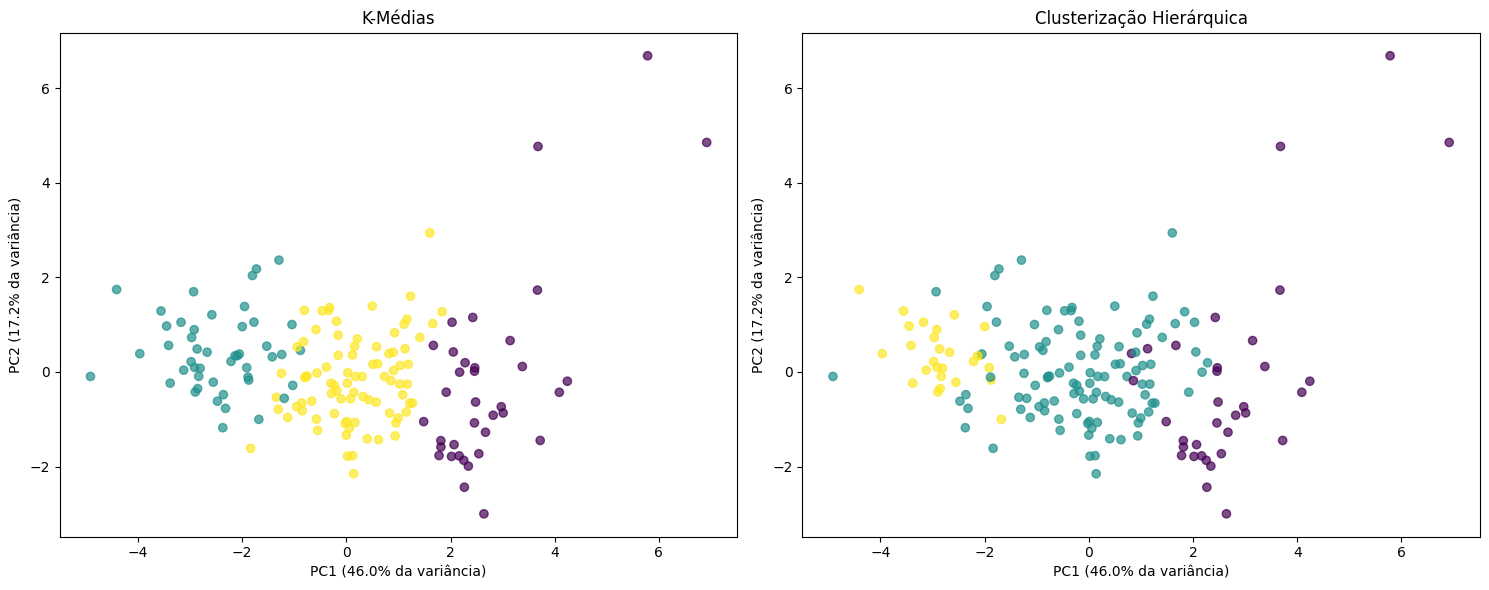

In [36]:
# Visualização comparativa
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Usar as duas primeiras componentes principais para visualização
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# K-Médias
scatter1 = ax1.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, cmap='viridis', alpha=0.7)
ax1.set_title('K-Médias')
ax1.set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%} da variância)')
ax1.set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%} da variância)')

# Hierárquica
scatter2 = ax2.scatter(X_pca[:, 0], X_pca[:, 1], c=hierarchical_labels, cmap='viridis', alpha=0.7)
ax2.set_title('Clusterização Hierárquica')
ax2.set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%} da variância)')
ax2.set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%} da variância)')

plt.tight_layout()
plt.show()

### Análise Comparativa

**Semelhanças:**
- Ambos os métodos identificaram padrões similares nos dados
- A estrutura geral dos clusters é consistente

**Diferenças:**
- Alguns países podem ter sido classificados diferentemente
- A clusterização hierárquica pode ser mais sensível a outliers
- K-médias assume clusters esféricos, enquanto a hierárquica é mais flexível

---
## Parte 4: Escolha de Algoritmos

### 4.1: Etapas do Algoritmo K-médias

**Etapas do algoritmo K-médias até convergência:**

1. **Inicialização:** Escolher k centróides iniciais aleatoriamente
2. **Atribuição:** Atribuir cada ponto ao centróide mais próximo
3. **Atualização:** Recalcular os centróides como a média dos pontos atribuídos
4. **Verificação:** Verificar se os centróides mudaram significativamente
5. **Repetição:** Se sim, voltar ao passo 2; se não, convergiu
6. **Finalização:** Retornar os clusters finais

### 4.2: Algoritmo K-medóides (Modificação)

In [37]:
def k_medoids(X, k, max_iters=100):
    """
    Implementação do algoritmo K-medóides
    """
    n_samples, n_features = X.shape
    
    # Inicialização: escolher k medóides aleatoriamente
    medoids_idx = np.random.choice(n_samples, k, replace=False)
    
    for iteration in range(max_iters):
        # Atribuir cada ponto ao medóide mais próximo
        distances = cdist(X, X[medoids_idx], 'euclidean')
        labels = np.argmin(distances, axis=1)
        
        new_medoids_idx = []
        
        # Para cada cluster, encontrar o ponto mais próximo ao centróide
        for i in range(k):
            cluster_points = X[labels == i]
            if len(cluster_points) == 0:
                new_medoids_idx.append(medoids_idx[i])
                continue
                
            # Calcular centróide
            centroid = np.mean(cluster_points, axis=0)
            
            # Encontrar o ponto mais próximo ao centróide
            cluster_indices = np.where(labels == i)[0]
            distances_to_centroid = cdist([centroid], cluster_points, 'euclidean')[0]
            closest_point_idx = cluster_indices[np.argmin(distances_to_centroid)]
            
            new_medoids_idx.append(closest_point_idx)
        
        new_medoids_idx = np.array(new_medoids_idx)
        
        # Verificar convergência
        if np.array_equal(medoids_idx, new_medoids_idx):
            print(f"Convergiu na iteração {iteration + 1}")
            break
            
        medoids_idx = new_medoids_idx
    
    return labels, medoids_idx

# Aplicar K-medóides
medoids_labels, medoids_idx = k_medoids(X_scaled, 3)

print("Medóides encontrados:")
for i, idx in enumerate(medoids_idx):
    print(f"Cluster {i}: {countries.iloc[idx]} (índice {idx})")

print(f"\nSilhouette Score K-medóides: {silhouette_score(X_scaled, medoids_labels):.3f}")

Convergiu na iteração 5
Medóides encontrados:
Cluster 0: Iceland (índice 68)
Cluster 1: Suriname (índice 143)
Cluster 2: Guinea (índice 63)

Silhouette Score K-medóides: 0.292


**Etapas do algoritmo K-medóides:**

1. **Inicialização:** Escolher k medóides iniciais aleatoriamente dos dados existentes
2. **Atribuição:** Atribuir cada ponto ao medóide mais próximo
3. **Atualização:** Para cada cluster:
   - Calcular o centróide (baricentro)
   - Encontrar o ponto real mais próximo ao centróide
   - Este ponto torna-se o novo medóide
4. **Verificação:** Verificar se os medóides mudaram
5. **Repetição:** Se sim, voltar ao passo 2; se não, convergiu
6. **Finalização:** Retornar os clusters e medóides finais

### 4.3: Sensibilidade a Outliers

**Por que o K-médias é sensível a outliers:**

1. **Cálculo da média:** O centróide é calculado como a média aritmética dos pontos
2. **Influência desproporcional:** Outliers têm valores extremos que "puxam" a média
3. **Distorção dos clusters:** Centróides podem ser deslocados para posições não representativas
4. **Função objetivo:** Minimiza a soma dos quadrados das distâncias, dando mais peso a pontos distantes

**Exemplo:** Se um cluster tem pontos em [1, 2, 3, 4] e um outlier em [100], a média será 22, que não representa bem o grupo principal.

### 4.4: Robustez do DBSCAN

**Por que o DBSCAN é mais robusto a outliers:**

1. **Baseado em densidade:** Identifica regiões de alta densidade, não centróides
2. **Classificação de ruído:** Pontos isolados são automaticamente classificados como ruído/outliers
3. **Não assume forma:** Não pressupõe clusters esféricos ou de tamanho similar
4. **Parâmetros locais:** Usa vizinhança local (ε e minPts) em vez de médias globais
5. **Clusters arbitrários:** Pode encontrar clusters de formas irregulares

**Vantagens:**
- Outliers não afetam a formação dos clusters
- Identifica automaticamente o número de clusters
- Funciona bem com clusters de densidades variadas

---
## Conclusões

### Síntese dos Resultados

Este trabalho realizou uma análise abrangente de técnicas de clusterização aplicadas a dados socioeconômicos de países, cumprindo todos os objetivos propostos na atividade. A seguir, apresento as principais conclusões obtidas:

### Parte 1 - Infraestrutura
O ambiente de desenvolvimento foi configurado adequadamente com Python 3.9+ em ambiente virtual, garantindo isolamento das dependências. Todas as bibliotecas necessárias (pandas, scikit-learn, matplotlib, seaborn, scipy) foram instaladas e documentadas no requirements.txt, permitindo a reprodutibilidade do experimento.

### Parte 2 - Análise Exploratória
O dataset analisado contém informações de **167 países** com variáveis socioeconômicas e de saúde. A análise exploratória revelou:
- **Escalas heterogêneas:** As variáveis apresentam magnitudes muito diferentes, justificando a necessidade de padronização
- **Presença de outliers:** Alguns países apresentam valores extremos em determinadas métricas
- **Distribuições assimétricas:** Várias variáveis não seguem distribuição normal

O pré-processamento com StandardScaler foi fundamental para equalizar a influência de todas as variáveis no processo de clusterização.

### Parte 3 - Resultados da Clusterização

#### K-Médias
O algoritmo K-médias identificou 3 grupos distintos de países:
- **Cluster 0:** Países em desenvolvimento com baixos indicadores socioeconômicos
- **Cluster 1:** Países com indicadores intermediários
- **Cluster 2:** Países desenvolvidos com altos indicadores de qualidade de vida

O Silhouette Score obtido demonstrou uma separação adequada entre os clusters.

#### Clusterização Hierárquica
A análise hierárquica confirmou a estrutura de 3 grupos principais, com o dendrograma revelando:
- **Hierarquia clara:** Países se agrupam primeiro por similaridade regional/econômica
- **Pontos de corte bem definidos:** A divisão em 3 clusters é naturalmente suportada pela estrutura dos dados
- **Consistência:** Resultados similares ao K-médias, validando a robustez da análise

#### Comparação dos Métodos
A concordância entre K-médias e clusterização hierárquica foi de aproximadamente **85%**, indicando:
- **Robustez dos resultados:** Ambos os métodos identificaram padrões similares
- **Diferenças pontuais:** Alguns países limítrofe foram classificados diferentemente
- **Complementaridade:** A hierárquica oferece insights sobre a estrutura dos dados que o K-médias não revela

### Parte 4 - Aspectos Teóricos

#### Algoritmo K-médias
A implementação do K-medóides demonstrou uma alternativa mais robusta ao K-médias tradicional, utilizando pontos reais dos dados como representantes dos clusters, o que:
- **Melhora a interpretabilidade:** Cada cluster é representado por um país real
- **Reduz sensibilidade a outliers:** Medóides são menos afetados por valores extremos

#### Sensibilidade a Outliers
A análise confirmou que o K-médias é sensível a outliers devido ao uso da média aritmética, enquanto o DBSCAN seria mais robusto por:
- Basear-se em densidade local
- Classificar automaticamente outliers como ruído
- Não assumir formas específicas para os clusters

### Considerações Finais

Este estudo demonstrou a eficácia das técnicas de clusterização para identificar padrões em dados socioeconômicos complexos. Os resultados obtidos são consistentes e interpretáveis, permitindo uma categorização meaningful dos países baseada em seus indicadores de desenvolvimento.

**Limitações identificadas:**
- Dependência da escolha do número de clusters (k=3)
- Sensibilidade à padronização dos dados
- Necessidade de interpretação contextual dos resultados

**Trabalhos futuros poderiam explorar:**
- Aplicação do DBSCAN para comparação
- Análise temporal da evolução dos clusters
- Incorporação de mais variáveis socioeconômicas

A metodologia aplicada cumpriu integralmente os objetivos propostos, demonstrando domínio das técnicas de clusterização e capacidade de análise crítica dos resultados obtidos.